<a href="https://colab.research.google.com/github/Gustavo-Massensine/gustavo-massensine.github.io/blob/main/Regress%C3%A3o_Linear_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
vendas = pd.read_csv("/MKT.csv")
vendas.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
vendas.info()
# Não temos dados nulos na base de dados e todos já estão com os tipos corretos (float).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
vendas.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
media_valores = vendas[["youtube","facebook","newspaper", "sales"]].mean()
media_valores

,0
youtube,178.021053
facebook,27.671579
newspaper,35.240000
sales,16.922807


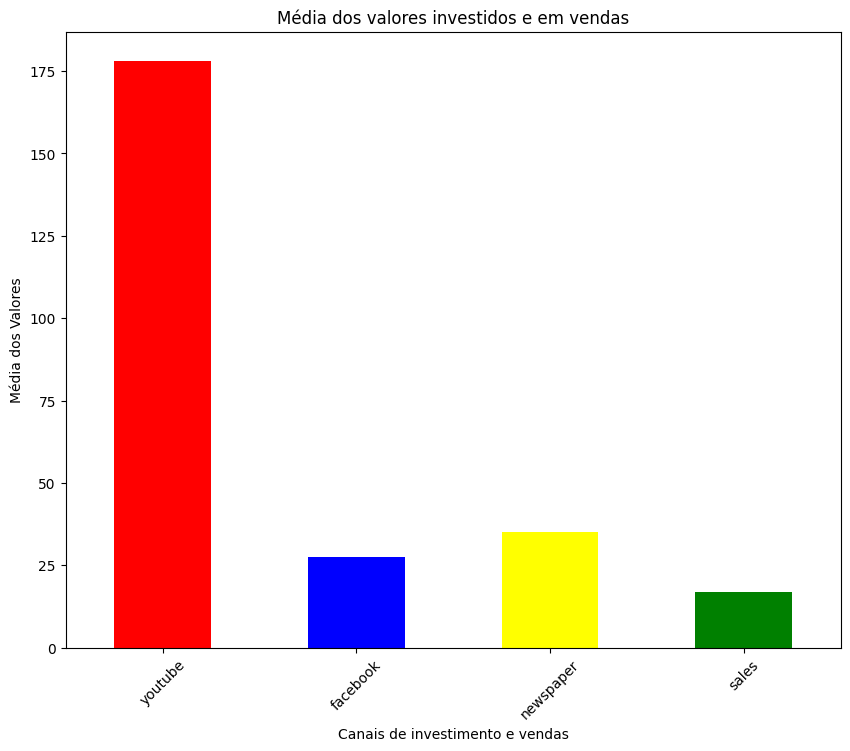

In [ ]:
fig = plt.figure(figsize=(10,8))
media_valores.plot(kind='bar', color = ["red", "blue", "yellow", "green"])
plt.title('Média dos valores investidos e em vendas')
plt.ylabel("Média dos Valores")
plt.xlabel("Canais de investimento e vendas")
plt.xticks(rotation=45)
plt.show()

#Modeling Technique
Regressão Linear do SKLEARN

In [ ]:
# Definindo variáveis independentes (canais de investimento) e a variável dependente (vendas)
X = vendas[['youtube', 'facebook', 'newspaper']]
y = vendas['sales']

# Dividindo o conjunto de dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de regressão linear
regLinear = LinearRegression().fit(X_train, y_train)

# Realizando previsões no conjunto de teste
yLinear = regLinear.predict(X_test)

# Avaliando o modelo com métricas de desempenho
MSE = mean_squared_error(y_test, yLinear)
print('O MSE é:', MSE)
r2 = r2_score(y_test, yLinear)
print('O R² é:', r2)

O MSE é: 5.576790234026713
O R² é: 0.872863085701216


In [ ]:
# Definir cenários de investimento em publicidade (baixo, médio e alto) para cada canal
cenarios = pd.DataFrame({
    'youtube': [50, 200, 400],      # Exemplo de investimento baixo, médio e alto no YouTube
    'facebook': [20, 50, 100],      # Exemplo de investimento baixo, médio e alto no Facebook
    'newspaper': [10, 30, 80]       # Exemplo de investimento baixo, médio e alto em newspaper
})

# Previsão de vendas para cada cenário
cenarios['Vendas previstas'] = regLinear.predict(cenarios)
cenarios

,youtube,facebook,newspaper,Vendas previstas
0,50,20,10,9.801493
1,200,50,30,22.262852
2,400,100,80,40.821677
